In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Problem 8: Kernelized linear regression

(-10.0, 10.0)

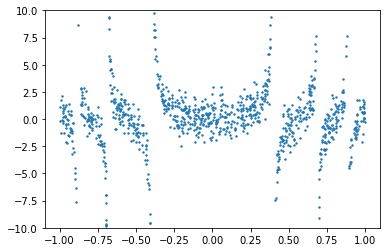

In [58]:
# let us generate some data
m = 1000
x = -1 + 2 * np.random.rand(m)
y = np.tan(10*x**2)+np.random.randn(m)
plt.scatter(x,y,s=2) # s controls the size of the data points
plt.ylim([-10,10])

The goal is to fit a **Kernelized Linear Regression Model** to the data points, and plot the model.
You will use three kernels

- Gaussian kernel $k(x,z)=e^{-\gamma \|x-z\|^2}$, 
- Sigmoid kernel $k(x,z)=\tanh(\gamma xz^T+r)$, and
- Polynomial kernel $k(x,z)=(1+xz^T)^d$,

where $\gamma$, $r$ and $d$ are parameters (chosen by you).

In [59]:
x = x.reshape(-1,1)
z= x.T.reshape(-1,1)

## Part 1: Gaussian kernel

In [60]:
lamb=20
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(x.reshape(m,1))
K= np.exp(-lamb*dist**2)
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

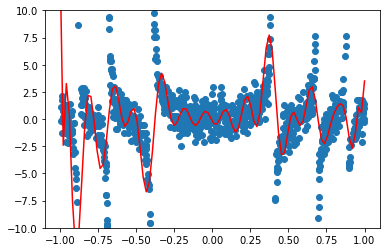

In [61]:
# plot results
num_points = 100
x_plot = np.linspace(-1,1,num_points).reshape(-1,1)
dist_plot = pairwise_distances(x_plot.reshape(num_points,1),x.reshape(m,1))
K_plot = np.exp(-lamb*dist_plot**2)
y_plot = K_plot.dot(alpha)

plt.scatter(x,y)
plt.ylim([-10,10])


plt.plot(x_plot,y_plot,'r')

## Part 2: Sigmoid kernel

In [62]:
lamb=2
r=-.001
K= np.tanh(lamb*(x.dot(z.T))+r)
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

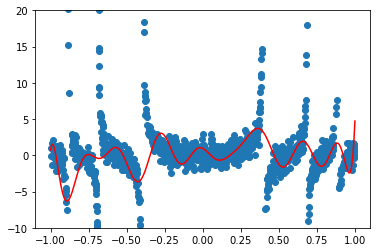

In [63]:
# plot results
num_points = 1000
x_plot = np.linspace(-1,1,num_points).reshape(-1,1)
dist_plot = pairwise_distances(x_plot.reshape(num_points,1),x.reshape(m,1))
K_plot = np.tanh(lamb*(x_plot.dot(z.T))+r)
y_plot = K_plot.dot(alpha)

plt.scatter(x,y)
plt.ylim([-10,20])


plt.plot(x_plot,y_plot,'r')

## Part 3: Polynomial kernel

In [64]:
d=50
K= (1+x.dot(z.T))**d
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

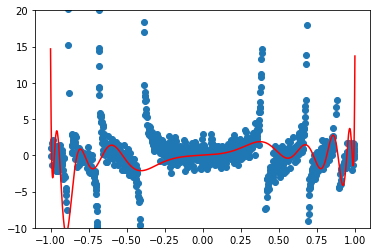

In [65]:
# plot results
num_points = 1000
x_plot = np.linspace(-1,1,num_points).reshape(-1,1)
K_plot = (1+x_plot.dot(z.T))**d
y_plot = K_plot.dot(alpha)

plt.scatter(x,y)
plt.ylim([-10,20])


plt.plot(x_plot,y_plot,'r')